In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import pylab as plt
import nltk
import glob

In [3]:
ham_address = '/Volumes/Extra/Columbia/Fall2018/Classes/ML/enron1/ham/'
spam_address = '/Volumes/Extra/Columbia/Fall2018/Classes/ML/enron1/spam/'

In [4]:
summary_file = open('/Volumes/Extra/Columbia/Fall2018/Classes/ML/enron1/Summary.txt')
summary = summary_file.read()
summary_file.close()

In [5]:
hams = []
hamfiles = sorted(glob.glob(ham_address+'*.txt'))
hfiles = len(hamfiles)
for i in range(hfiles):
    file = open(hamfiles[i], 'rt')
    text = file.read()
    hams.append(text)
    file.close()

In [6]:
spams = []
spamfiles = sorted(glob.glob(spam_address+'*.txt'))
sfiles = len(spamfiles)
for i in range(sfiles):
    file = open(spamfiles[i], 'rt', encoding="latin-1")
    text = file.read()
    spams.append(text)
    file.close()

In [7]:
## word stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import RegexpTokenizer
ps = PorterStemmer()
#nltk.download()

In [47]:
def embed_one(datalist):
    """
    Construct stemmed+bag-of-words model for individual then construct an array of individual bags
    
    Returns
    a collection of individual set dict corresponding to its counts
    """
    bag_collection = []
    ndata = len(datalist)
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    
    for i in range(ndata):
        stemmed = []
        token = tokenizer.tokenize(datalist[i])
        for w in token:
            stemmed.append(ps.stem(w))
    
        nstem = len(stemmed)
        one_bag = {}
        
        for j in range(nstem):
            key = stemmed[j]
            if key in one_bag:
                one_bag[key] += 1
            else:
                one_bag[key] = 1
        bag_collection.append(one_bag)
        
    return bag_collection

def embed_whole(datalist):
    """
    From a list of data (should have multiple), do stemming (+remove non-words) then apply the bag-of-words model
    
    Returns
    a dictionary of bag-of-words each dic corresponding to its counts
    """
    bag = {}
    ndata = len(datalist)
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    
    for i in range(ndata):
        stemmed = []
        token = tokenizer.tokenize(datalist[i])
        for w in token:
            stemmed.append(ps.stem(w))
        #stemmed = list(set(stemmed))
        nstem = len(stemmed)
        for j in range(nstem):
            key = stemmed[j]
            if key in bag:
                bag[key] += 1
            else:
                bag[key] = 1        
    return bag
    

In [46]:
ham_one_bag = embed_one(hams)
spam_one_bag = embed_one(spams)

In [48]:
whole = np.concatenate((hams, spams))
whole_bag = embed_whole(whole)

In [49]:
spam_sum_bag = embed_whole(spams)
ham_sum_bag = embed_whole(hams)

In [13]:
def overlap(dict1, dict2):
    """
    Find the overlapping dictionaries
    """
    key1 = set(dict1.keys())
    key2 = set(dict2.keys())
    intersection = key1 & key2
    newdict1 = {}
    newdict2 = {}
    intersection = list(intersection)
    ninter = len(intersection)
    for i in range(ninter):
        newdict1[intersection[i]] = dict1[intersection[i]]
        newdict2[intersection[i]] = dict2[intersection[i]]
    return newdict1, newdict2
    

In [50]:
ovlp_spam, ovlp_ham = overlap(spam_sum_bag, ham_sum_bag)

In [41]:
phrase = ['I likes you like you tree']
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
words=tokenizer.tokenize(phrase[0])
emp = []
for w in words:
    emp.append(ps.stem(w))

In [42]:
emp

['I', 'like', 'you', 'like', 'you', 'tree']

In [262]:
diff_dicts = key_differences(spam_sum_bag, ham_sum_bag)

In [256]:
def key_differences(dict1, dict2):
    dict1_key = dict1.keys()
    dict2_key = dict2.keys()
    dict1_only = list(set(dict1_key)-set(dict2_key))
    dict2_only = list(set(dict2_key)-set(dict1_key))
    
    allkeys = list(dict1_key|dict2_key)
    
    diff_dics = {}
    for i in range(len(allkeys)):
        if allkeys[i] in dict1_only:
            diff_dics[allkeys[i]] = dict1[allkeys[i]]
        elif allkeys[i] in dict2_only:
            diff_dics[allkeys[i]] = dict2[allkeys[i]]
        else:
            diff_dics[allkeys[i]] = np.abs(dict1[allkeys[i]] -  dict2[allkeys[i]])
    
    diff_dics = sorting_hand(diff_dics)
    return diff_dics

In [254]:
def sorting_hand(dic, sort='descending'):
    """
    Input dictionary and sort it 
    """
    if sort == 'descending':
        sorted_dic = sorted(dic.items(), key=lambda x: x[1], reverse=True)
    elif sort == 'ascending':
        sorted_dic = sorted(dic.items(), key=lambda x: x[1], reverse=False)
    return sorted_dic
        

In [264]:
sorted_whole = sorting_hand(whole_bag)

In [263]:
diff_dicts

[('ect', 13886),
 ('the', 11061),
 ('to', 9999),
 ('hou', 7273),
 ('enron', 6555),
 ('for', 5456),
 ('on', 4782),
 ('subject', 4745),
 ('2000', 4230),
 ('i', 4091),
 ('deal', 3443),
 ('and', 2994),
 ('will', 2741),
 ('ga', 2718),
 ('meter', 2715),
 ('is', 2642),
 ('be', 2602),
 ('thi', 2583),
 ('you', 2568),
 ('have', 2383),
 ('cc', 2367),
 ('hpl', 2318),
 ('pm', 2307),
 ('am', 2277),
 ('at', 2246),
 ('a', 2230),
 ('pleas', 2229),
 ('from', 2228),
 ('we', 2071),
 ('that', 2066),
 ('if', 2037),
 ('2001', 2020),
 ('thank', 1945),
 ('daren', 1901),
 ('com', 1724),
 ('by', 1658),
 ('01', 1652),
 ('volum', 1645),
 ('corp', 1644),
 ('000', 1633),
 ('me', 1546),
 ('re', 1529),
 ('10', 1517),
 ('in', 1427),
 ('mmbtu', 1408),
 ('forward', 1383),
 ('need', 1379),
 ('1', 1303),
 ('know', 1298),
 ('j', 1264),
 ('00', 1234),
 ('nom', 1184),
 ('11', 1182),
 ('d', 1182),
 ('of', 1170),
 ('03', 1148),
 ('attach', 1143),
 ('chang', 1130),
 ('farmer', 1122),
 ('contract', 1075),
 ('12', 1067),
 ('are', 

In [281]:
whole_one_bag = embed_one(whole)

In [288]:
whole_one_bag[10]

{'1': 1,
 '2000': 2,
 '37159': 1,
 'a': 3,
 'account': 7,
 'add': 1,
 'advanc': 1,
 'all': 1,
 'alloc': 3,
 'allow': 1,
 'an': 1,
 'and': 7,
 'ani': 2,
 'anyon': 1,
 'area': 1,
 'as': 4,
 'assist': 1,
 'at': 1,
 'attend': 1,
 'avail': 1,
 'back': 1,
 'backup': 1,
 'be': 2,
 'befor': 1,
 'began': 1,
 'believ': 1,
 'but': 1,
 'by': 1,
 'call': 1,
 'chanc': 1,
 'commerci': 1,
 'concern': 1,
 'concernig': 1,
 'confirm': 1,
 'continu': 2,
 'contract': 3,
 'cooper': 1,
 'coordin': 1,
 'critic': 1,
 'deal': 1,
 'discuss': 1,
 'distribut': 1,
 'dure': 1,
 'each': 2,
 'earli': 1,
 'effect': 1,
 'email': 1,
 'encourag': 1,
 'entex': 6,
 'especi': 1,
 'etc': 1,
 'everyon': 2,
 'feel': 1,
 'few': 2,
 'final': 1,
 'first': 1,
 'for': 4,
 'free': 1,
 'from': 3,
 'front': 1,
 'get': 1,
 'give': 1,
 'group': 2,
 'ha': 1,
 'hard': 1,
 'have': 1,
 'held': 1,
 'hi': 1,
 'hope': 1,
 'howard': 3,
 'i': 4,
 'identifi': 1,
 'if': 2,
 'in': 4,
 'initi': 3,
 'is': 2,
 'issu': 2,
 'januari': 1,
 'juli': 1,
 'ki

In [286]:
whole_one_bag[0].keys()

dict_keys(['subject', 'christma', 'tree', 'farm', 'pictur'])

In [291]:
top_dicts= diff_dicts[:6]

In [333]:
ect_count, ect_mid = median_cut(whole_one_bag, top_dicts[0][0])

In [323]:
def median_cut(embedded_dict, keyword):
    """
    Cut the whole thing into median
    """
    ndict = len(embedded_dict)
    count = np.zeros(ndict)
    #count = np.zeros(10)
    for i in range(ndict):
        onekeys = embedded_dict[i].keys()
        if keyword in onekeys:
            #print (embedded_dict[i][keyword])
            count[i] = embedded_dict[i][keyword]
            
        else:
            count[i] = 0
            
    return count, np.median(count)

In [340]:
median_cut(spam_one_bag, top_dicts[0][0])

(array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), 0.0)

(array([ 4279.,   108.,    58.,    83.,    41.,    67.,    40.,    45.,
           61.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 9 Patch objects>)

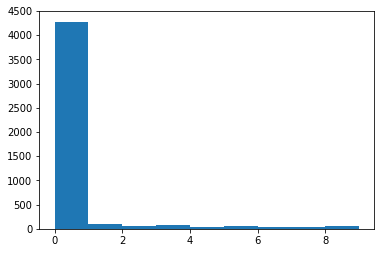

In [334]:
plt.hist(ect_count, bins=np.arange(0,10))

In [345]:
len(np.where(ect_count == 0)[0])

4279

In [355]:
np.zeros((5,2), dtype=np.float32)

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]], dtype=float32)

In [375]:
def find_decision_threshold(train1, train2, keyword):
    """
    Compute the entropy to determine the decision boundary
    """
    train1_distr, train1_med = median_cut(train1, keyword)
    train2_distr, train2_med = median_cut(train2, keyword)
    
    maxi = int(np.max(np.concatenate((train1_distr,train2_distr))))
    
    entropies = np.zeros((maxi, 2))
    weighted_entrop = np.zeros(maxi)
    #print (np.sum(train1_distr)+np.sum(train2_distr))
    print (maxi)
    for i in range(maxi):
        ntrain1_low = len(np.where(train1_distr <= i)[0])
        ntrain2_low = len(np.where(train2_distr <= i)[0])
        entropies[i,0] = compute_entropy(ntrain1_low, ntrain2_low)
        
        ntrain1_high = len(np.where(train1_distr > i)[0])
        ntrain2_high = len(np.where(train2_distr > i)[0])
        entropies[i,1] = compute_entropy(ntrain1_high, ntrain2_high)
        
        ntrain_low = ntrain1_low + ntrain2_low
        ntrain_high = ntrain1_high + ntrain2_high
        all_ntrain = ntrain_low + ntrain_high
    
        weighted_entrop[i] = ntrain_low / all_ntrain * entropies[i,0] + ntrain_high / all_ntrain * entropies[i,1]
        
    return np.nanargmin(weighted_entrop)

In [381]:
a_low, a_high, b_low, b_high = Decision_Tree(spam_one_bag, ham_one_bag, top_dicts[0][0])

342


/Users/Doyeon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log2
  
/Users/Doyeon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


In [386]:
len(a_low) + len(a_high) + len(b_low) + len(b_high)

5172

In [391]:
class DTnode(object):
    def __init__(self, threshold, major, feature, left, right):
        self.threshold = threshold
        self.feature = feature
        self.left = left
        self.right = right
        self.major = major
    

In [ ]:
def Make_DT(train1, train2, featurelist):
    if len(train1) > len(train2):
        major = 0.
    else:
        major = 1.    
    
    #if len(featurelist) == 0:
    
    feature = featurelist[0]
    thresh = find_decision_threshold(train1, train2, feature)
    
    low1, high1, low2, high2 = spliting_sets(train1, train2, feature)
    
    
    featurelist = featurelist[1:]
    return_node = DTnode(threshold=thresh, major=major, feature=feature, left=None, right=None)
    if len(featurelist) == 0:
        return return_node
    if 
        
        
    
    

In [389]:
def spliting_sets(train1, train2, keyword):
    """
    Spliting
    """
    cut_thresh = find_decision_threshold(train1, train2, keyword)
    train1_distr, train1_med = median_cut(train1, keyword)
    train2_distr, train2_med = median_cut(train2, keyword)
    
    ntrain1 = len(train1_distr)
    ntrain2 = len(train2_distr)
    
    train1_low = []
    train1_high = []
    train2_low = []
    train2_high = []
    
    for i in range(ntrain1):
        if train1_distr[i] <= cut_thresh:
            train1_low.append(train1[i])
        else:
            train1_high.append(train1[i])
        
    for j in range(ntrain2):
        if train2_distr[i] <= cut_thresh:
            train2_low.append(train2[i])
        else:
            train2_high.append(train2[i])
    
    return train1_low, train1_high, train2_low, train2_high
    
    
    
    

In [249]:
def compute_entropy(train1_count, train2_count):
    """
    Compute Entropy to judge whether this is a good classifier for one dictionary
    """
    if any(train1_count)
    total_count = train1_count + train2_count
    
    ratio1 = train1_count / total_count
    ratio2 = train2_count / total_count
    entropy = - ratio1 * np.log2(ratio1) - ratio2 * np.log2(ratio2)
    return entropy
    

def Decision_Tree(test, train1, train2, entropy_thresh=0.8):
    """
    Compute Entropy of test which overlaps with the training sets with Decision Tree
    
    Input 
    test = ['email message']
    train1&2 [dict] : a dictionary of total bag-of-words
    Returns to entropy
    """
    testing = embed_one(test)[0]
    testkeys = testing.keys()
    train1_keys = train1.keys()
    train2_keys = train2.keys()
    merged_keys = (set(train1_keys) | set(train2_keys))
    #testkeys_list = list(testkeys)
    ntest = len(testkeys)
    tk1_only = list(set(train1_keys)-set(train2_keys))
    tk2_only = list(set(train2_keys)-set(train1_keys))
    all_train = np.vstack((train1, train2))
    
    weights = np.ones(2)

    for tk in testkeys:
        if tk in tk1_only:
            weights[0] *= 1000
        elif tk in tk2_only:
            weights[1] *= 1000
        elif tk not in merged_keys:
            pass
        else:
            entropy = compute_entropy(train1[tk], train2[tk])
            if entropy >= entropy_thresh:
                #print (testing[tk], train1[tk], train2[tk])
                weights[0] *= testing[tk] / train1[tk]
                weights[1] *= testing[tk] / train2[tk]  
                
    return weights 
    

def Naive_Bayes(test, train, prior=1500/5172):
    """
    Compute the score of test with respect to training sets using Naive Bayes
    
    Input
    test = ['email message']
    train [dict] : a dictionary of total bag-of-words
    prior = N_email / N_total (eg. 1500/5172 for SPAM or 3672/1500 for HAM)
    Returns to scores
    """
    train_keys = train.keys()
    all_train_vals = sum(list(train.values())) ## sum of all occurances
    
    ### find the overlapping term
    testing = embed_one(test)[0]
    testkeys = testing.keys()
    ntest = len(testkeys)
    
    score = prior
    
    for i in range(ntest):
        denominator = (all_train_vals + ntest+1)
        tkey = list(testkeys)[i]
        if tkey in train_keys:
            multi_factor = testing[tkey]
            score *= ((train[tkey] + 1) / denominator)**(multi_factor)
        else:
            score *= 1 / denominator
            
    return score


def NN_Distances(test, train, nn_option='L2'):
    """
    Compute the distance of test based on training sets using Nearest Neighbor
    test: test [one_email] ; train (individual dictionaries)
    
    Input:
    test = ['email message']
    train [list] : a collection of individual set dict
    
    Returns to the array of distances
    """
    testing = embed_one(test)[0] ## because it's just one
    testkeys = testing.keys()
    ntest = len(testkeys)

    ntrain = len(train)
    dist = np.zeros(ntrain)
    
    for i in range(ntrain):
        onekey = train[i].keys()
        one_eval = testing.copy()
        one_eval.update(train[i]) ## for all un-matching dictionaries
        for j in range(ntest):
            if list(testkeys)[j] in onekey:
                thiskey = list(testkeys)[j]
                one_eval[thiskey] = train[i][thiskey] - testing[thiskey] ## subtract only when items are matching
            else:
                pass
            
        one_eval = np.array(list(one_eval.values()))
        #print (one_eval)
        if nn_option == 'L1' or nn_option == 'Linf':
            dist[i] = sum(np.abs(one_eval))
        elif nn_option == 'L2':
            dist[i] = np.sqrt(sum(one_eval**2))
            
    return dist


In [67]:
NN_Distances(phrase, spam_one_bag, nn_option='L2') ## Returns to distance measures

array([ 16.58312395,  10.95445115,   6.92820323, ...,   5.74456265,
         5.74456265,  16.37070554])

In [139]:
Naive_Bayes(phrase, ham_sum_bag) ## Returns to score

3.8051631976513072e-22

In [245]:
Decision_Tree(phrase, ham_sum_bag, spam_sum_bag, entropy_thresh=0.8)

array([  2.35642591e-07,   4.74802019e-07])

In [241]:
ham_testing[10]

'Subject: meter 1431 - nov 1999\ndaren -\ncould you please resolve this issue for howard ? i will be out of the office\nthe next two days .\nwhen this is done , please let george know . thanks .\naimee\n- - - - - - - - - - - - - - - - - - - - - - forwarded by aimee lannou / hou / ect on 12 / 15 / 99 01 : 27 pm\n- - - - - - - - - - - - - - - - - - - - - - - - - - -\nhoward b camp\n12 / 15 / 99 01 : 01 pm\nto : aimee lannou / hou / ect @ ect\ncc : daren j farmer / hou / ect @ ect , stacey neuweiler / hou / ect @ ect , mary m\nsmith / hou / ect @ ect\nsubject : meter 1431 - nov 1999\naimee ,\nsitara deal 92943 for meter 1431 has expired on oct 31 , 1999 . settlements\nis unable to draft an invoice for this deal . this deal either needs to be\nextended or a new deal needs to be set up . please let me know when this is\nresolved . we need it resolved by friday , dec 17 .\nhc'

In [248]:
NN_Distances(ham_testing[10], ham_sum_bag)

KeyError: 0

In [224]:
## Returns to a common measure
def Classifier(new, one, two, option='NB', nn_option='L2'):
    """
    For "overlapping" bag of words between new and training sets, evaluate probability based on classifier of choice
    NB: Naive Bayes; DT: Decision Tree; NN: Nearest Neighbors
    New (to-be-examined); one(training 1); two(training 2)
    """
    
    ntest = len(new)
    scores = np.zeros((ntest,2))
    if option == 'NN':
        one_bag = embed_one(one) 
        two_bag = embed_one(two)
    else:
        one_bag = embed_whole(one)
        two_bag = embed_whole(two)
        
    for n in range(ntest):
        if option == 'NN':
            dist_one = NN_Distances(new[n], one_bag, nn_option)
            dist_two = NN_Distances(new[n], two_bag, nn_option)
            if nn_option == 'L1' or nn_option == 'L2':
                scores[n,0] = 1 / np.sum(dist_one) ## only for NN smaller number signifies better score
                scores[n,1] = 1 / np.sum(dist_two)
            elif nn_option == 'Linf':
                scores[n,0] = np.max(dist_one)
                scores[n,1] = np.max(dist_two)

        elif option == 'NB':
            scores[n,0] = Naive_Bayes(new[n], one_bag)
            scores[n,1] = Naive_Bayes(new[n], two_bag)

        elif option == 'DT':
            scores[n] = Decision_Tree(new[n], one_bag, two_bag, entropy_thresh=0.8)
            
    return scores

In [230]:
np.zeros((8,2))[7,0]

0.0

In [151]:
### TESTING SET

In [191]:
random_draw0 = np.random.random_integers(0,3500,1000)
ramdom_draw1 = np.random.random_integers(0,1499,1000)

/Users/Doyeon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(0, 3500 + 1) instead
  """Entry point for launching an IPython kernel.
/Users/Doyeon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: This function is deprecated. Please call randint(0, 1499 + 1) instead
  


In [187]:
hams_array = np.array(hams.copy())
spams_array = np.array(spams.copy())

In [232]:
ham_test_index = np.array(list(set(np.arange(len(hams)))- set(random_draw0))[:100])
spam_test_index = np.array(list(set(np.arange(len(spams)))- set(ramdom_draw1))[:100])

ham_testing = hams_array[[ham_test_index]]
spam_testing = spams_array[[spam_test_index]]

In [233]:
ham_training = hams_array[[random_draw0]]
spam_training = spams_array[[ramdom_draw1]]

In [234]:
nb_scores_ham = Classifier(ham_testing, ham_training, spam_training, option='NB', nn_option='L2')
nb_scores_spam = Classifier(spam_testing, ham_training, spam_training, option='NB', nn_option='L2')

In [235]:
print (np.sum(nb_scores_ham, axis=0), np.sum(nb_scores_spam, axis=0))

[ 0.00019363  0.00016005] [ 0.00019363  0.00016005]


In [236]:
nnl1_scores_ham = Classifier(ham_testing, ham_training, spam_training, option='NN', nn_option='L1')
nnl1_scores_spam = Classifier(spam_testing, ham_training, spam_training, option='NN', nn_option='L1')

nnl2_scores_ham = Classifier(ham_testing, ham_training, spam_training, option='NN', nn_option='L2')
nnl2_scores_spam = Classifier(spam_testing, ham_training, spam_training, option='NN', nn_option='L2')

nnlinf_scores_ham = Classifier(ham_testing, ham_training, spam_training, option='NN', nn_option='Linf')
nnlinf_scores_spam = Classifier(spam_testing, ham_training, spam_training, option='NN', nn_option='Linf')

In [237]:
print (np.sum(nnl1_scores_ham, axis=0), np.sum(nnl1_scores_spam, axis=0))
print (np.sum(nnl2_scores_ham, axis=0), np.sum(nnl2_scores_spam, axis=0))
print (np.sum(nnlinf_scores_ham, axis=0), np.sum(nnlinf_scores_spam, axis=0))

[ 0.0006632   0.00054884] [ 0.0006632   0.00054884]
[ 0.00489144  0.00479541] [ 0.00489144  0.00479541]
[ 275800.  233400.] [ 275800.  233400.]


In [47]:
### only evaluate the overlapping keywords?
inter_spam, inter_ham = overlap(spam_bag, ham_bag)

In [233]:
### INCORRECT (Without Stemming)
def embed_whole(datalist):
    """
    From a list of data (should have multiple), do stemming (+remove non-words) then apply the bag-of-words model
    
    Returns
    a dictionary of bag-of-words each dic corresponding to its counts
    """
    bag = {}
    ndata = len(datalist)
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    
    for i in range(ndata):
        stemmed = tokenizer.tokenize(datalist[i])
        nstem = len(stemmed)
        for j in range(nstem):
            key = stemmed[j]
            if key in bag:
                bag[key] += 1
            else:
                bag[key] = 1        
    return bag

def embed_one(datalist):
    """
    Construct stemmed+bag-of-words model for individual then construct an array of individual bags
    
    Returns
    a collection of individual set dict corresponding to its counts
    """
    bag_collection = []
    ndata = len(datalist)
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    
    for i in range(ndata):
        one_bag = {}
        stemmed = tokenizer.tokenize(datalist[i])
        nstem = len(stemmed)
        for j in range(nstem):
            key = stemmed[j]
            if key in one_bag:
                one_bag[key] += 1
            else:
                one_bag[key] = 1
        bag_collection.append(one_bag)
        
    return bag_collection